In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,   ## rescale or normalize the images pixels, by dividing them 255
    shear_range = 0.2,  ## angle for slant of image in degrees
    zoom_range = 0.2,   ## for zoom in or out
    horizontal_flip = True 
)
training_set = train_datagen.flow_from_directory(
    'D:\\movie-recommendation-system\\Emotion_detection\\data\\train',   ## give path of training set
    target_size=(48,48),      ## target_size of image in which you want
    batch_size=32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 27472 images belonging to 7 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'D:\\movie-recommendation-system\\Emotion_detection\\data\\test',
    target_size = (48,48),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


In [5]:
model_path1 = 'D:\\movie-recommendation-system\\Emotion_detection\\app\\best.h5'
model1 = load_model(model_path1)
train_loss, train_acc = model1.evaluate(training_set)
test_loss, test_acc   = model1.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 58s 260ms/step - loss: 0.7570 - accuracy: 0.7434
final train accuracy = 88.06 , validation accuracy = 74.34


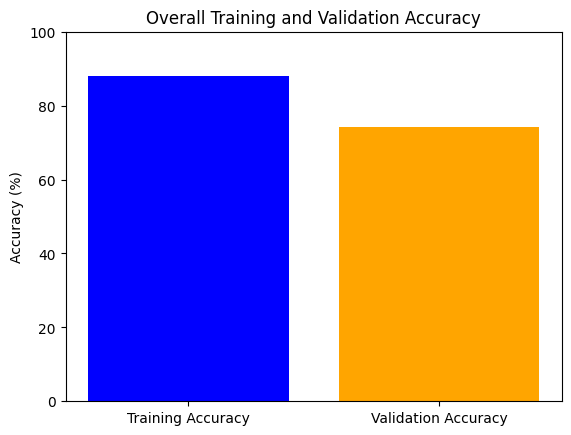

In [7]:
import matplotlib.pyplot as plt

# Plotting overall training and validation accuracy
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_acc * 100, test_acc * 100], color=['blue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Overall Training and Validation Accuracy')
plt.ylim(0, 100)  # Set y-axis range from 0 to 100 for clarity
plt.show()

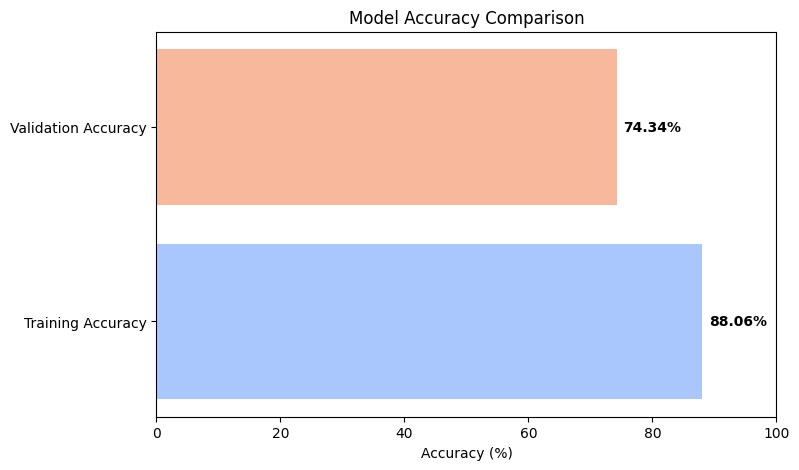

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette for gradient effect
colors = sns.color_palette("coolwarm", 2)

# Horizontal bar plot with gradient colors
plt.figure(figsize=(8, 5))
plt.barh(['Training Accuracy', 'Validation Accuracy'], [train_acc * 100, test_acc * 100], color=colors)
plt.xlabel('Accuracy (%)')
plt.xlim(0, 100)  # Set x-axis range from 0 to 100 for better comparison
plt.title('Model Accuracy Comparison')
for index, value in enumerate([train_acc * 100, test_acc * 100]):
    plt.text(value + 1, index, f"{value:.2f}%", va='center', fontweight='bold')  # Label each bar with its value
plt.show()


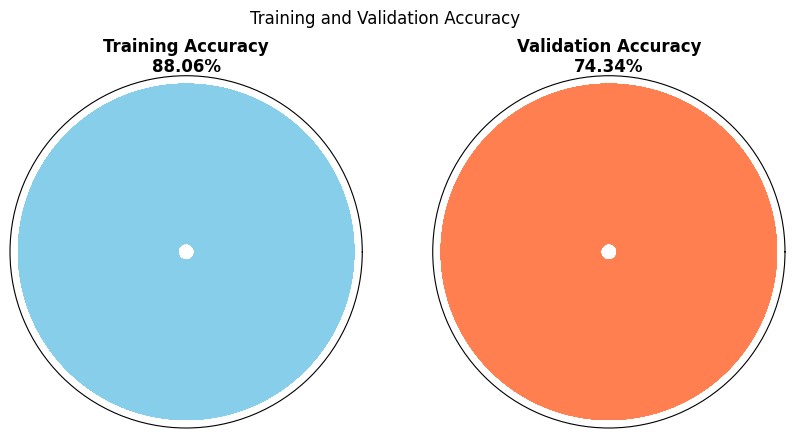

In [11]:
import matplotlib.pyplot as plt

# Set up figure for the gauge chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': 'polar'})
fig.suptitle('Training and Validation Accuracy')

# Function to create a gauge for accuracy
def plot_gauge(ax, accuracy, title, color):
    ax.barh([1], [accuracy], color=color, height=0.5)
    ax.set_yticks([])  # Hide radial labels
    ax.set_xticks([])  # Hide angular labels
    ax.set_title(f"{title}\n{accuracy:.2f}%", va='center', fontweight='bold')

# Plot gauges for training and validation accuracy
plot_gauge(ax[0], train_acc * 100, "Training Accuracy", 'skyblue')
plot_gauge(ax[1], test_acc * 100, "Validation Accuracy", 'coral')
plt.show()


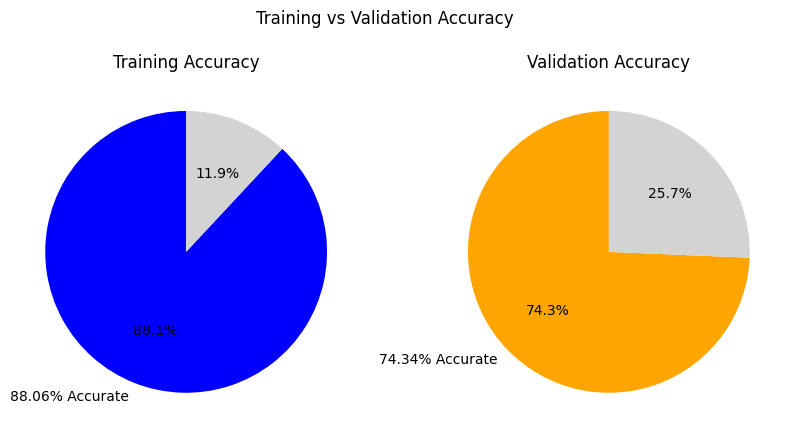

In [14]:
# Pie chart for training and validation accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Training vs Validation Accuracy")

# Plot training accuracy pie chart
ax[0].pie([train_acc * 100, 100 - train_acc * 100], labels=[f'{train_acc * 100:.2f}% Accurate', ''], 
          startangle=90, colors=['blue', 'lightgray'], autopct='%1.1f%%')
ax[0].set_title("Training Accuracy")

# Plot validation accuracy pie chart
ax[1].pie([test_acc * 100, 100 - test_acc * 100], labels=[f'{test_acc * 100:.2f}% Accurate', ''], 
          startangle=90, colors=['orange', 'lightgray'], autopct='%1.1f%%')
ax[1].set_title("Validation Accuracy")

plt.show()
